In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV files
roads_df = pd.read_csv('roads_dummy_data.csv')
buildings_df = pd.read_csv('buildings_dummy_data.csv')

In [3]:
print(roads_df.shape)
roads_df.head()


(900, 6)


,Road ID,Road Name,Length (km),Type,Condition,Year Built
0,R1,Road_1,4.1,Dirt,Good,1999.0
1,R2,Road_2,9.5,Asphalt,Good,1985.0
2,R3,Road_3,7.5,Dirt,Good,1991.0
3,R4,NaN,6.2,Asphalt,Good,1981.0
4,R5,NaN,NaN,Dirt,Good,1986.0


In [4]:
print(buildings_df.shape)
buildings_df.head()

(900, 6)


,Building ID,Building Name,Building Type,Floors,Year Built,Condition
0,B1,Building_1,Residential,4.0,1998.0,Good
1,B2,Building_2,Government,7.0,2018.0,Fair
2,B3,Building_3,Residential,NaN,1991.0,Good
3,B4,Building_4,Residential,7.0,1994.0,Good
4,B5,Building_5,Government,5.0,2010.0,NaN


In [5]:
# Check for missing values
print("\nMissing Values in Roads Data:")
print(roads_df.isnull().sum())



Missing Values in Roads Data:
Road ID        90
Road Name      90
Length (km)    90
Type           90
Condition      90
Year Built     90
dtype: int64


In [6]:
print("\nMissing Values in Buildings Data:")
print(buildings_df.isnull().sum())


Missing Values in Buildings Data:
Building ID      90
Building Name    90
Building Type    90
Floors           90
Year Built       90
Condition        90
dtype: int64


In [7]:
# Fill missing numerical values with mean
for col in ['Length (km)', 'Year Built']:
    roads_df[col].fillna(roads_df[col].mean(), inplace=True)

In [8]:

for col in ['Floors', 'Year Built']:
    buildings_df[col].fillna(buildings_df[col].mean(), inplace=True)

In [9]:
# Fill missing categorical values with mode
for col in ['Road Name', 'Type', 'Condition']:
    roads_df[col].fillna(roads_df[col].mode()[0], inplace=True)

In [10]:
for col in ['Building Name', 'Building Type', 'Condition']:
    buildings_df[col].fillna(buildings_df[col].mode()[0], inplace=True)

In [11]:
# Check for missing values after filling
print("\nMissing Values in Roads Data after filling:")
print(roads_df.isnull().sum())


Missing Values in Roads Data after filling:
Road ID        90
Road Name       0
Length (km)     0
Type            0
Condition       0
Year Built      0
dtype: int64


In [12]:
print("\nMissing Values in Buildings Data after filling:")
print(buildings_df.isnull().sum())


Missing Values in Buildings Data after filling:
Building ID      90
Building Name     0
Building Type     0
Floors            0
Year Built        0
Condition         0
dtype: int64


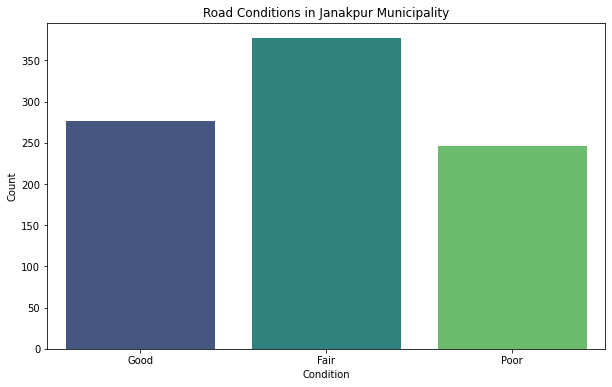

In [13]:
# Visualization
# Plotting the conditions of roads
plt.figure(figsize=(10, 6))
sns.countplot(data=roads_df, x='Condition', palette='viridis')
plt.title('Road Conditions in Janakpur Municipality')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

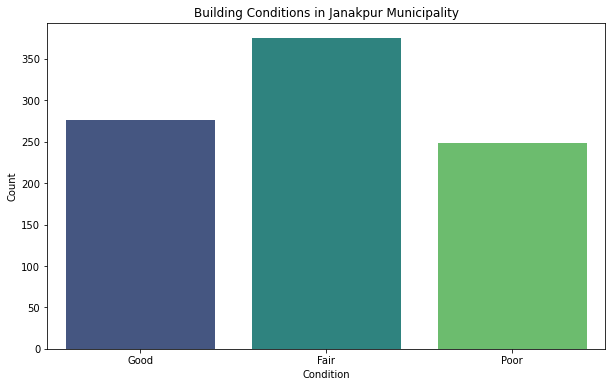

In [14]:
# Plotting the conditions of buildings
plt.figure(figsize=(10, 6))
sns.countplot(data=buildings_df, x='Condition', palette='viridis')
plt.title('Building Conditions in Janakpur Municipality')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [15]:
# Analysis
# Average length of roads by type
avg_length_by_type = roads_df.groupby('Type')['Length (km)'].mean().reset_index()
print("\nAverage Length of Roads by Type:")
print(avg_length_by_type)


Average Length of Roads by Type:
      Type  Length (km)
0  Asphalt     5.201944
1     Dirt     5.205973
2   Gravel     5.026431


In [16]:
# Number of buildings by type
buildings_by_type = buildings_df['Building Type'].value_counts().reset_index()
buildings_by_type.columns = ['Building Type', 'Count']
print("\nNumber of Buildings by Type:")
print(buildings_by_type)


Number of Buildings by Type:
  Building Type  Count
0   Residential    370
1    Government    275
2    Commercial    255


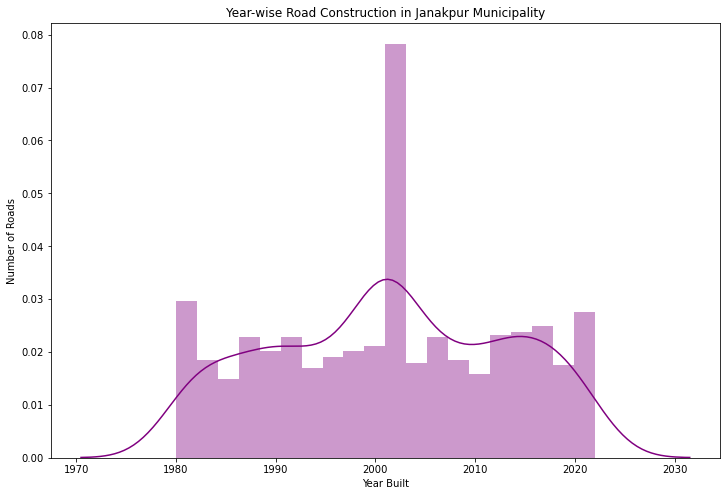

In [17]:
# Year-wise road construction
plt.figure(figsize=(12, 8))
sns.distplot(roads_df['Year Built'].dropna(), kde=True, bins=20, color='purple') 
plt.title('Year-wise Road Construction in Janakpur Municipality')
plt.xlabel('Year Built')
plt.ylabel('Number of Roads')
plt.show()

In [18]:
# print("Seaborn version:", sns.__version__)

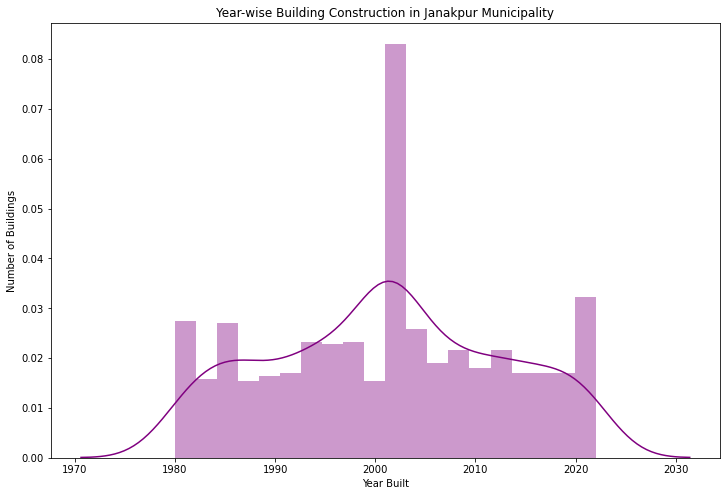

In [19]:
# Year-wise building construction
plt.figure(figsize=(12, 8))
sns.distplot(buildings_df['Year Built'].dropna(), kde=True, bins=20, color='purple')  # Using 'purple' color
plt.title('Year-wise Building Construction in Janakpur Municipality')
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')
plt.show()